<a href="https://colab.research.google.com/github/annaa-pe/first_repo/blob/master/2406_pandas_en_acci%C3%B3n_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON Y PANDAS EN ACCIÓN
## **Análisis del catálogo de series de Netflix**

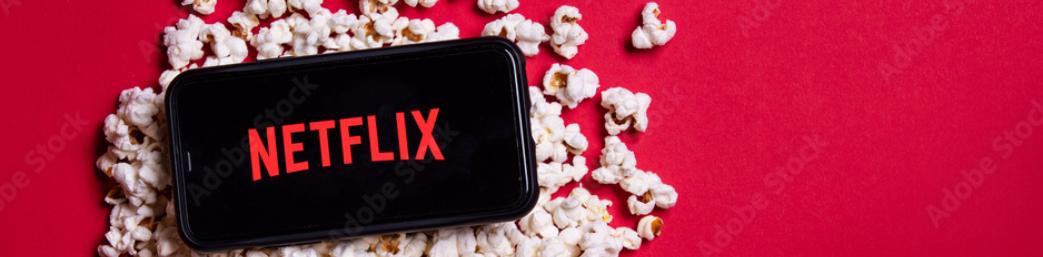

En primer lugar, importemos las librerías necesarias:

In [1]:
import pandas as pd

Importemos nuestro dataset:

In [2]:
df = pd.read_csv('drive/MyDrive/NDS/datasets/netflix_shows.csv')

Cómo son los datos con los que trabajaremos? Que columnas tenemos? Cuántas filas? Que tipo de datos contiene cada columna?

In [3]:
df.head()

,title,release_year,runtime,main_genre,main_production,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,30,comedy,GB,4,8.8,72895
1,Seinfeld,1989,24,comedy,US,9,8.9,302700
2,Knight Rider,1982,51,action,US,4,6.9,33760
3,Thomas & Friends,1984,10,family,GB,24,6.5,4948
4,Saved by the Bell,1989,23,comedy,US,5,7.1,34854


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1809 non-null   object 
 1   release_year     1809 non-null   int64  
 2   runtime          1809 non-null   int64  
 3   main_genre       1809 non-null   object 
 4   main_production  1809 non-null   object 
 5   seasons          1809 non-null   int64  
 6   imdb_score       1809 non-null   float64
 7   imdb_votes       1809 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 113.2+ KB


Tenemos nulos?

In [5]:
print(df.isnull().sum())

title              0
release_year       0
runtime            0
main_genre         0
main_production    0
seasons            0
imdb_score         0
imdb_votes         0
dtype: int64


Tenemos duplicados?

In [6]:
df.shape

(1809, 8)

In [7]:
df.drop_duplicates().shape

(1809, 8)

Obtengamos unos primeros estadísticos de los datos que contiene la tabla

In [8]:
print(df.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes
count   1809.000000  1809.000000  1809.000000  1809.000000  1.809000e+03
mean    2017.091211    38.841349     2.268657     7.035268  1.809636e+04
std        5.087941    17.632706     2.748233     1.058585  7.230311e+04
min     1969.000000     0.000000     1.000000     1.600000  5.000000e+00
25%     2016.000000    25.000000     1.000000     6.500000  4.890000e+02
50%     2018.000000    41.000000     1.000000     7.200000  1.903000e+03
75%     2020.000000    49.000000     3.000000     7.800000  7.645000e+03
max     2022.000000   178.000000    42.000000     9.500000  1.727694e+06


Después de verificar que nuestros datos estén limpios... Empecemos a sacar conclusiones!

Cuál es el TOP 10 series mejor puntuadas? 👑

In [9]:
df[['title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)

,title,imdb_score
35,Breaking Bad,9.5
49,Avatar: The Last Airbender,9.3
1239,Kota Factory,9.3
1030,Our Planet,9.3
389,Reply 1988,9.2
1560,Who Rules The World,9.2
628,My Mister,9.2
969,The Last Dance,9.1
1466,Arcane,9.1
34,Okupas,9.0


Cuáles son las 10 series más populares? Midiendo la popularidad en votos

In [10]:
df[['title', 'imdb_votes']].sort_values(by='imdb_votes', ascending=False).head(10)

,title,imdb_votes
35,Breaking Bad,1727694
281,Stranger Things,989090
36,The Walking Dead,945125
142,Black Mirror,515577
211,House of Cards,494092
200,Peaky Blinders,485506
962,The Witcher,465949
522,Money Heist,450797
45,Supernatural,428639
150,Arrow,425716


Investiguemos si un mayor número de votos suele conllevar una puntuación más alta!🧐

<Axes: xlabel='imdb_score', ylabel='imdb_votes'>

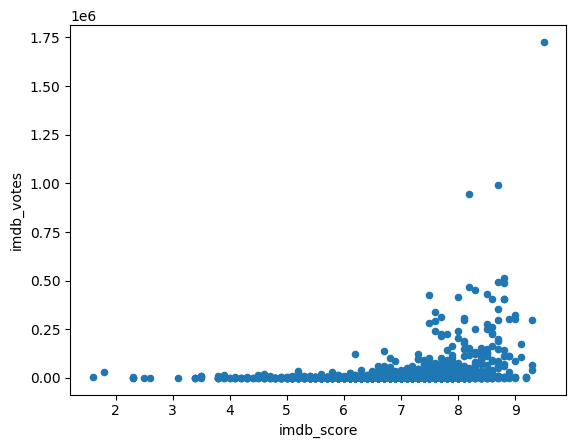

In [11]:
df.plot(kind='scatter', x='imdb_score', y='imdb_votes')

In [12]:
df[['imdb_score', 'imdb_votes']].corr()

,imdb_score,imdb_votes
imdb_score,1.000000,0.246523
imdb_votes,0.246523,1.000000


Cuáles son los géneros favoritos de los espectadores? Averigualo mirando la puntuación media de cada género y obteniendo los de puntuación más alta!

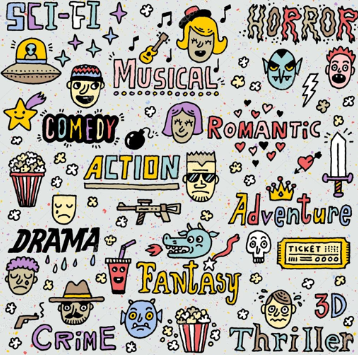

In [13]:
df.groupby('main_genre')['imdb_score'].mean().sort_values(ascending=False)

main_genre
western          8.100000
history          7.825000
sport            7.600000
war              7.289655
drama            7.287865
documentation    7.231073
crime            7.174016
scifi            7.065049
action           6.991667
comedy           6.952830
romance          6.916667
thriller         6.858824
animation        6.812264
family           6.532143
reality          6.408784
music            6.340000
fantasy          6.336364
horror           5.233333
Name: imdb_score, dtype: float64

En cambio, cuáles deben ser los géneros de los que hay más oferta de series? Hagamos un Wordcloud en el que como mayor sea la palabra del género, más representación habrá de este

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

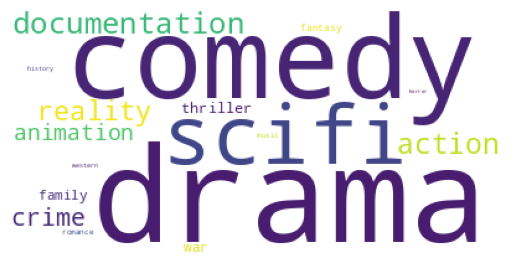

In [15]:
wordcloud = WordCloud(background_color="white").generate(' '.join(df['main_genre']))

plt.imshow(wordcloud)
plt.axis("off");

In [16]:
df['main_genre'].value_counts()

main_genre
drama            445
comedy           318
scifi            206
documentation    177
action           156
reality          148
crime            127
animation        106
thriller          34
war               29
family            28
fantasy           11
romance            6
music              5
western            4
history            4
horror             3
sport              2
Name: count, dtype: int64

Cuáles son los 10 países que crean una mayor cantidad de contenido? 🌎

In [17]:
df['main_production'].value_counts().nlargest(10)

main_production
US    721
JP    157
KR    143
GB    125
ES     67
FR     57
CA     50
CN     43
AU     40
IN     39
Name: count, dtype: int64

Traslademos estos resultados a un un gráfico de barras! 📊

<Axes: xlabel='main_production'>

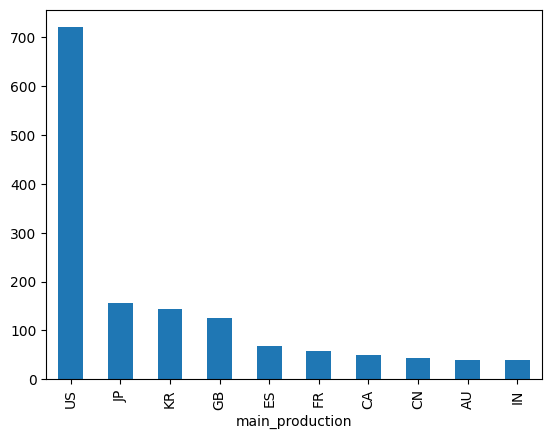

In [18]:
df['main_production'].value_counts().nlargest(10).plot(kind='bar')

Ahora veamos estas métricas en porcentaje:

In [19]:
df['main_production'].value_counts(normalize=True)*100

main_production
US    39.856274
JP     8.678828
KR     7.904920
GB     6.909895
ES     3.703704
FR     3.150912
CA     2.763958
CN     2.377004
AU     2.211166
IN     2.155887
MX     2.045329
TW     1.879491
BR     1.879491
DE     1.492537
CO     1.326700
TR     1.050304
IT     0.995025
TH     0.939746
AR     0.829187
SG     0.608071
SE     0.552792
RU     0.552792
PL     0.552792
DK     0.497512
BE     0.497512
ZA     0.442233
NO     0.442233
IL     0.386954
NL     0.276396
SA     0.221117
PH     0.221117
LB     0.165837
NG     0.165837
FI     0.165837
XX     0.165837
EG     0.165837
NZ     0.165837
HK     0.165837
IS     0.165837
AE     0.110558
JO     0.110558
IO     0.110558
AT     0.110558
IE     0.110558
PT     0.110558
PR     0.055279
ID     0.055279
LU     0.055279
HR     0.055279
BY     0.055279
PE     0.055279
MY     0.055279
UA     0.055279
KW     0.055279
SN     0.055279
CL     0.055279
Name: proportion, dtype: float64

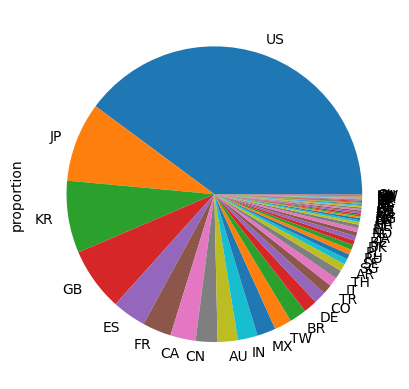

In [20]:
df['main_production'].value_counts(normalize=True).plot(kind='pie');

Comentemos cuáles son las principales conclusiones que hemos sacado de este análisis!